In [74]:
import numpy as np
from copy import deepcopy
import seaborn as sns
import pandas as pd
import math
import matplotlib.pyplot as plt

In [6]:
len(np.load('results/digits_2/experiment_0.npy', allow_pickle=True))

854

In [91]:
def data_by_reps(exp_id):
    all = [[len(np.load(f'results/digits_{exp_id}/experiment_0.npy', allow_pickle=True))]]
    for rep in range(1, 20):
        try:
            data = np.load(f'results/digits_{exp_id}/experiment_{rep}.npy', allow_pickle=True)
        except:
            print(rep)
            continue
        new_all = deepcopy(all[-1])
        new_all.append(len(data))
        all.append(new_all)
    d = []

    for i in range(len(all)):
        for val in all[i]:
            d.append([i, val])
    df = pd.DataFrame(d, columns=['rep', 'val'])
    return df


7


(350.0, 450.0)

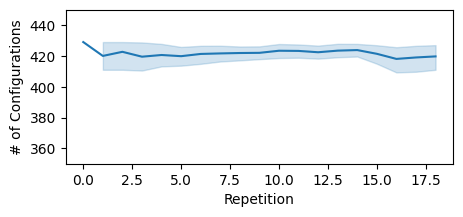

In [96]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.lineplot(data=data_by_reps(1), x='rep', y='val', ax=ax)
plt.xlabel('Repetition')
plt.ylabel('# of Configurations')
plt.ylim(350, 450)

Text(0, 0.5, '# of Configurations')

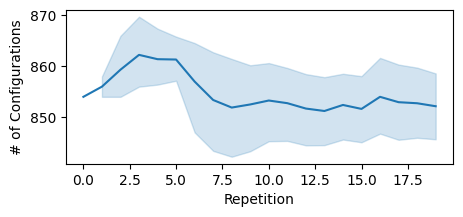

In [98]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.lineplot(data=data_by_reps(2), x='rep', y='val', ax=ax)
plt.xlabel('Repetition')
plt.ylabel('# of Configurations')
# plt.ylim(350, 450)

1


Text(0, 0.5, '# of Configurations')

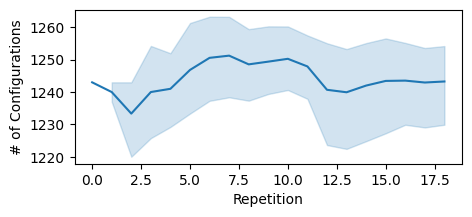

In [99]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.lineplot(data=data_by_reps(3), x='rep', y='val', ax=ax)
plt.xlabel('Repetition')
plt.ylabel('# of Configurations')
# plt.ylim(350, 450)

1
6
15
19


(350.0, 450.0)

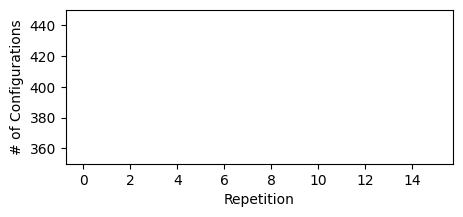

: 

In [100]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.lineplot(data=data_by_reps(4), x='rep', y='val', ax=ax)
plt.xlabel('Repetition')
plt.ylabel('# of Configurations')
plt.ylim(350, 450)

In [62]:
def myround(x, base=5):
    return base * round(x/base)

In [79]:
def acc_over_time(exp_id):
    all = []
    d = []
    for rep in range(1, 20):
        cur = 0
        bests = []
        try:
            data = np.load(f'results/digits_{exp_id}/experiment_{rep}.npy', allow_pickle=True)
        except:
            print(rep)
            continue
        start_time = data[0][1]
        for res, time in data:
            val = res.value
            if val > cur:
                cur = val
            bests.append([cur, round(time - start_time)])
        for i in range(180):
            m = 0
            for val, time in bests:
                if time > i:
                    break
                if val > m:
                    m = val
            d.append([m, i])
    df = pd.DataFrame(d, columns=['val', 'time'])
    return df

In [80]:
df1 = acc_over_time(1)
df2 = acc_over_time(2)
df3 = acc_over_time(3)
df4 = acc_over_time(4)

7
1
1
6
12
13
14
15
16
17
18
19


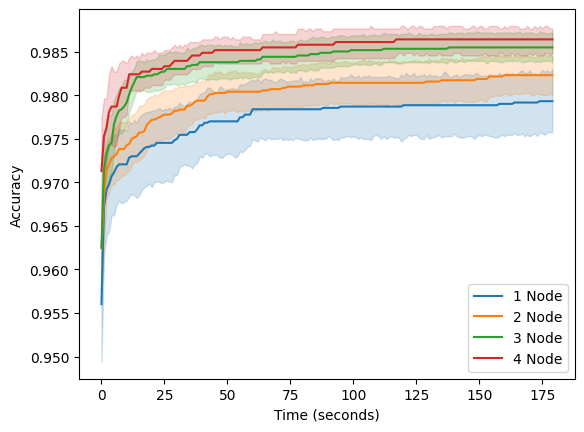

In [83]:
sns.lineplot(df1, x='time', y='val', label='1 Node')
sns.lineplot(df2, x='time', y='val', label='2 Node')
sns.lineplot(df3, x='time', y='val', label='3 Node')
sns.lineplot(df4, x='time', y='val', label='4 Node', legend=True)

plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.savefig('figures/acc_over_time.pdf')
plt.savefig('figures/acc_over_time.png')